# Кватернионный регулятор обратной связи для вращения по собственной оси космического аппарата

## Е. Кузьмичёва (Б03-906)

### Введение
#### Постановка задачи
Рассматривается вращение космического аппарата под действием закрепленных на корпусе крутящих устройств.
#### Вращение вокруг собственной оси
Если возникает необходимость измененить положение аппарата в пространстве, это можно сделать с помощью нескольких последовательных поворотов вокруг каждой из осей управления. В настоящее время в большинстве систем используется этот метод. Однако, существует более быстрый способ осуществления манёвра - поворот вокруг собственной оси. Из теоремы Эйлера известно, что угол поворота $\phi$ вокруг собственной оси меньше суммы трёх углов Эйлера и является кратчайшим угловым путём между двумя ориентациями.  
Здесь далее будем рассматривать переориентацию под большим углом, также будем считать идеальным управляющий крутящий момент.  

#### Основные идеи
1. Манёвр вращения вокруг собственной оси можно провести, используя кватернионный регулятор обратной связи. Задача сводится к правильному выбору матриц коэффициентов в уравнениях, описывающих движение.
2. Различные регуляторы можно исследовать на устойчивость и глобальную устойчивость.
3. Выведена функция Ляпунова, обеспечивающая достаточное условие глобальной стабильности регулятора. Этот результат помогает в выборе матриц коэффициентов.

### Теоретические сведения
Замкнутая система уравнений, описывающая данное вращение, в кватернионах имеет вид:
$$\left\{ 
\begin{array}\\
\dot{q} = \frac{1}{2} q \circ \boldsymbol \omega \\
\mathbf J\cdot\dot{\boldsymbol \omega} = -\boldsymbol \omega \times (\mathbf J \cdot \boldsymbol \omega + \mathbf h) + \mathbf T_{ext} + \mathbf T_{ctrl}\\
\dot{\mathbf h} = -\mathbf T_{ctrl}\\
\end{array}
\right. $$

Здесь векторная часть кватерниона $\mathbf q$ характеризует направления оси Эйлера, скалярная - угол поворота вокруг неё. $\mathbf J$ соответствует тензору инерции тела. $\mathbf h$ - угловой момент, $\mathbf T_{ctrl}$ - управляющий момент, $\mathbf T_{ext}$ - момент внешних сил. Как видно, неизвестными здесь являются $q,\;\mathbf h,\;\boldsymbol \omega$.  
Кватернионный регулятор обратной связи состоит из
- обратной связи, линейной по кватерниону ошибок;
- обратной связи, линейной по скорости;
- слагаемого, нелинейного по скорости.



Управляющий вектор выражается следующим образом:  
$$
\mathbf T_{ctrl} = \mathbf J \cdot \dot{\boldsymbol \omega}+ \boldsymbol \omega \times (\mathbf J \cdot \boldsymbol \omega + \mathbf h) - \mathbf T_{ext}- \mathbf K_{\omega} \cdot \delta \boldsymbol {\omega} - \mathbf K_q \cdot \delta \mathbf q
$$
Здесь $\delta \mathbf q$ и $\delta \boldsymbol \omega$ характеризуют ошибку управления (отклонение от требуемого режима). $\mathbf K_q,\;\mathbf K_{\omega}$ - матрицы коэффициентов.

В общем случае 2-ое уравнение системы можно записать в виде:  
$$
\mathbf J \cdot \boldsymbol{\omega} = (1-\mu) \boldsymbol \Omega \cdot \mathbf J - \mathbf K_{\omega} \cdot \boldsymbol \omega - \mathbf K_q \cdot \mathbf q,
$$
где
$
\boldsymbol \Omega = 
\left( 
\begin{matrix}
0\;\;-\omega_3\;\;\omega_2\\
\omega_3\;\;0\;\;-\omega_1\\
-\omega_2 \;\; \omega_1\;\;0\\
\end{matrix}
\right).
$  
Здесь коэффициент $\mu = 1$ описывает ситуацию, когда управляющий момент полностью противодействует моменту гироскопической связи. $\mu = 0$ - когда присутствует только кватернионная обратная связь и линейная обратная связь по скорости. В случае, который реализован далее, начальное значение угловой скорости таково, что матрица $\boldsymbol \Omega \cdot \mathbf J$ нулевая, поэтому значение $\mu$ не используется.

#### Устойчивость системы
Считая матрицы $\mathbf K_q^{-1}$ и $\mathbf K_q^{-1}J$ существующими и положительно определёнными, вводится в рассмотрение функция Ляпунова:
$$
V = \frac12 \boldsymbol \omega^T \mathbf K_q^{-1} \mathbf J \boldsymbol \omega + (q_0-1)^2 + q_1^2 + q_2^2 + q_3^2,
$$
причём заметим, что она является положительно определённой и ассимптотически неограниченной по $\boldsymbol \omega$. Проведя некоторые преобразования и воспользовавшись уравнением движения, можно получить формулу:
$$
\dot V = -\boldsymbol \omega^T \mathbf K_1^{-1}\mathbf K_{\omega} \boldsymbol\omega +(1-\mu)\boldsymbol\omega^T \mathbf K_q^{-1} \boldsymbol \Omega \mathbf J \boldsymbol \omega.
$$
Второе слагаемое желательно занулить. Сделать это можно двумя способами: $\mu = 1$ либо $\mathbf K_q^{-1}=\alpha \mathbf J + \beta \mathbf I$. Первое условие не всегда можно обеспечить (оно означает полное отсутствие гироскопического момента). В таких случаях надо брать матрицу $\mathbf K_q^{-1}=\alpha \mathbf J + \beta \mathbf I$, но тогда встаёт вопрос: какими должны быть коэффициенты $\alpha$ и $\beta$? Об этом чуть ниже.  

Проведя ещё некоторые преобразования, нетрудно получить:
$$
\dot V = -\boldsymbol \omega^T \mathbf K_q^{-1}\mathbf K_{\omega} \boldsymbol \omega.
$$
Отсюда видно, что глобальная устойчивость наблюдается только при положительной определённости матрицы $\mathbf K_q^{-1} \mathbf K_{\omega}$.

Из теории следует, что вращение вокруг оси Эйлера может быть достигнуто только с помощью  матрицы коэффициентов $K$, пропорциональной матрице инерции. Отсюда и из предыдущего утверждения следует, что $\mathbf K_{\omega} =k_{\omega} \mathbf J,\;k_{\omega}>0$.  

Вернёмся к вопросу выбора коэффициентов $\alpha$ и $\beta$. В этом случае их выбор должен быть обусловлен сведением к минимуму "расстояния" между матрицей $\mathbf K_q$ и матрицей инерции $\mathbf J$.

### Численное моделирование
Как было сказано выше, основная сложность задачи состоит в выборе матриц коэффициентов. Проверим, что выбор матриц $\mathbf K_{\omega} = k_{\omega} \mathbf J, \mathbf K_q = k_q \mathbf J$ обеспечивает вращение вокруг собственной оси.  
####  Данные
Главные моменты инерции: $J_1 = 1200,\;J_2 = 2200,\;J_3 = 3100$.  
Начальные условия на кватернион: $ q(0) = \left({0.159, 0.57, 0.57, 0.57}\right)^T$, т.е. начальный угол равен $161.7^{\circ}$.  
Начальные условия на угловую скорость $\boldsymbol \omega(0) = (0.01, 0.01, 0.01)^T$ рад/с.  
Желаемое время переориентации $50$ с.  
Матрицы коэффициентов $\mathbf K_q = diag(60, 110, 155),\;\mathbf K_{\omega} = 0.316\cdot diag(1200, 2200, 3100)$.  

In [2]:
import numpy as np
from sympy import *
from scipy import interpolate
from matplotlib import pyplot as plt

#### Задание параметров сетки и исходных численных данных

In [3]:
N = 1001 # количество узлов сетки
T = 100 # время наблюдений
tau = T/N # шаг сетки

q = np.array([0.57, 0.57, 0.57, 0.159])
omega = np.array([0.01, 0.01, 0.01])

k_q = 0.05
k_omega = 0.316
J = np.diag([1200, 2200, 3100])

#### Векторное и кватернионное умножение

In [4]:
# векторное умножение
def cross_product(a, b):
    return np.array([a[1]*b[2]-a[2]*b[1], a[2]*b[0]-a[0]*b[2], a[0]*b[1] - a[1]*b[0]])

# кватернионное умножение
def quaternion_product(l, m):
    return np.concatenate([l[3]*m - cross_product(l[:3], m), [- l[:3] @ m]])

#### Расчёт
Имеем систему вида $$\frac{d \mathbf f}{dt}(\mathbf x, t) = \mathbf g(\mathbf x).$$ Решаем её явным методом Рунге-Кутты 4-го порядка.  
$$
\mathbf k_1 = \mathbf f(\mathbf x^n);\\
\mathbf k_2 = \mathbf f(\mathbf x^n + \frac{\tau}4 \mathbf k_1);\\
\mathbf k_3 = \mathbf f(\mathbf x^n + \frac{\tau}2 \mathbf k_2);\\
\mathbf k_4 = \mathbf f(\mathbf x^n + \tau (\mathbf k_1 - 2\mathbf k_2 + 2 \mathbf k_3));\\
\mathbf x^{n+1} = \mathbf x^n + \frac{\tau} 6 (\mathbf k_1 + 4\mathbf k_3 + \mathbf k_4).
$$

In [5]:
q_arr, omega_arr, t_arr = [], [], []

def f_q(q, omega):
    return 1/2*quaternion_product(q, omega)

def f_w(q, omega):
    return -k_omega*omega - k_q*q[:3]

for i in range(N):
    q_arr.append(q)
    omega_arr.append(omega)
    t_arr.append(tau*i)
    
    k1_q = f_q(q, omega)
    k1_w = f_w(q, omega)
    
    k2_q = f_q(q + tau/4*k1_q, omega + tau/4*k1_w)
    k2_w = f_w(q + tau/4*k1_q, omega + tau/4*k1_w)
    
    k3_q = f_q(q + tau/2*k2_q, omega + tau/2*k2_w)
    k3_w = f_w(q + tau/2*k2_q, omega + tau/2*k2_w)
    
    k4_q = f_q(q + tau*(k1_q - 2*k2_q + 2*k3_q), omega + tau*(k1_w - 2*k2_w + 2*k3_w))
    k4_w = f_w(q + tau*(k1_q - 2*k2_q + 2*k3_q), omega + tau*(k1_w - 2*k2_w + 2*k3_w))
    
    q_n = q + tau/6 * (k1_q + 4*k3_q + k4_q)
    omega_n = omega + tau/6 * (k1_w + 4*k3_w + k4_w)
    
    q, omega = q_n, omega_n
    
q_arr = np.array(q_arr)

#### Вычисление управляющего момента

In [6]:
def u_calc(omega_arr, q_arr):
    u = []
    for i in range(len(omega_arr)):
        u.append(cross_product(J@omega_arr[i]-k_omega, omega_arr[i]) - k_q*q_arr[i])
    return np.array(u)

#### Вспомогательные функции для визуализации

In [7]:
# визуализирует зависимости каждой из компонент кватерниона от времени
def quaternion_plot(q_arr, q0_arr):
    q_arr = np.array(q_arr)

    fig, ax = plt.subplots(2, 2, figsize = (10, 6))

    ax[0][0].plot(t_arr, q_arr[:, 0], color = 'darkblue')
    ax[0][0].set_title('$q_1$')

    ax[0][1].plot(t_arr, q_arr[:, 1], color = 'darkblue')
    ax[0][1].set_title('$q_2$')

    ax[1][0].plot(t_arr, q_arr[:, 2], color = 'darkblue')
    ax[1][0].set_title('$q_3$')

    ax[1][1].plot(t_arr, q0_arr, color = 'darkblue')
    ax[1][1].set_title('$q_0$')


    for i in range(2):
        for j in range(2):
            ax[i][j].set_xlim((0, 100))
            ax[i][j].grid()

    plt.show()
    
# визуализирует зависимости каждой из компонент угловой скорости от времени
def omega_plot(omega_arr):
    omega_arr = np.array(omega_arr)
    # если нужно построить 3 графика
    '''
    _, ax = plt.subplots(3, 1, figsize = (5, 10))

    ax[0].plot(t_arr, omega_arr[:, 0], color = 'darkblue')
    ax[0].set_title('$\omega_1$')

    ax[1].plot(t_arr, omega_arr[:, 1], color = 'darkblue')
    ax[1].set_title('$\omega_2$')

    ax[2].plot(t_arr, omega_arr[:, 2], color = 'darkblue')
    ax[2].set_title('$\omega_3$')

    for _ in ax:
        _.set_xlim((0, 100))
        _.grid()
    '''
    
    # Построим только один график
    fig, ax = plt.subplots(1, 1)
    ax.plot(t_arr, omega_arr[:, 0], color = 'darkblue')
    ax.set_title('$\omega_1$')
    ax.grid()

    plt.show()
    
# визуализирует, как зависят друг от друга различные компоненты векторной части кватерниона (т.е. направления оси Эйлера)
def qq_plot(q_arr):
    q_arr = np.array(q_arr)
    _, ax = plt.subplots(2, 2, figsize = (10, 10))

    f = q_arr[:, 1] >= 0
    g = q_arr[:, 1][f] <= 0.5
    ax[0][0].plot(q_arr[:, 0][f][g], q_arr[:, 1][f][g], color = 'darkblue')
    ax[0][0].set_xlabel('$q_1$')
    ax[0][0].set_ylabel('$q_2$')

    f = q_arr[:, 2] >= 0
    g = q_arr[:, 2][f] <= 0.5
    ax[0][1].plot( q_arr[:, 1][f][g], q_arr[:, 2][f][g], color = 'darkblue')
    ax[0][1].set_xlabel('$q_2$')
    ax[0][1].set_ylabel('$q_3$')

    f = q_arr[:, 0] >= 0
    g = q_arr[:, 0][f] <= 0.5
    ax[1][0].plot( q_arr[:, 2][f][g], q_arr[:, 0][f][g], color = 'darkblue')
    ax[1][0].set_xlabel('$q_3$')
    ax[1][0].set_ylabel('$q_1$')

    for _ in ax[0]:
        _.grid()

    for _ in ax[1]:
        _.grid()


    plt.show()
    
def Omega(omega):
    return np.array([[0, -omega[2], omega[1]],
                     [omega[2], 0, -omega[0]],
                     [-omega[1], omega[0], 0]])

# визуализирует зависимость i-й компоненты вектора управляющего моментв от времени
def u_plot(number):
    u = []
    for i in range(len(omega_arr)):
        u.append((-Omega(omega_arr[i])@J-k_omega)@omega_arr[i] - k_q*q_arr[i][:3])
    u = np.array(u)

    fig, ax = plt.subplots(1, 1)
    ax.plot(t_arr[10:], np.array(u[:, number-1][10:])*30, color = 'darkblue')
    ax.grid()
    ax.set_title('$u_' + str(number) + '$')
    ax.set_xlim((10, 100))
    ax.set_ylim((-160, 10))
    
# визуализирует зависимость угла поворота по собственной оси от времени
def eigenangle_plot(q0_arr):
    q0_ = q0_arr/np.max(q0_arr)
    plt.plot(t_arr[:int(N/2)], np.rad2deg(np.arccos(q0_)*2)[:int(N/2)], color = 'darkblue')
    plt.grid()
    plt.title('eigen angle')
    plt.xlim(0, T/2)

#### Эволюция кватерниона во времени

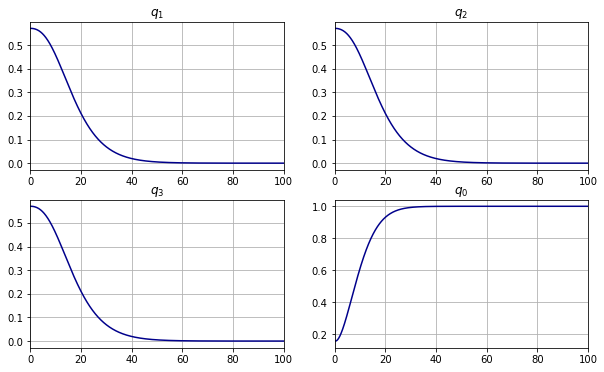

In [8]:
quaternion_plot(q_arr[:, :3], q_arr[:, 3])

#### Эволюция угловой скорости во времени
В данном случае все компоненты угловой скорости одинаковы в каждый момент времени, потому что так были заданы начальные данные (поэтому здесь приведён только один график). Но, вообще говоря, это не так.

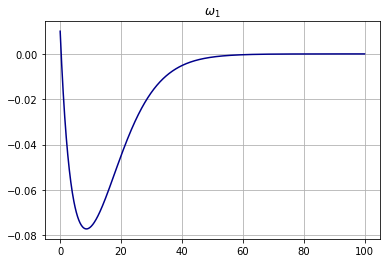

In [9]:
omega_plot(omega_arr)

#### Графики компонент вектора направления оси Эйлера в зависимости друг от друга

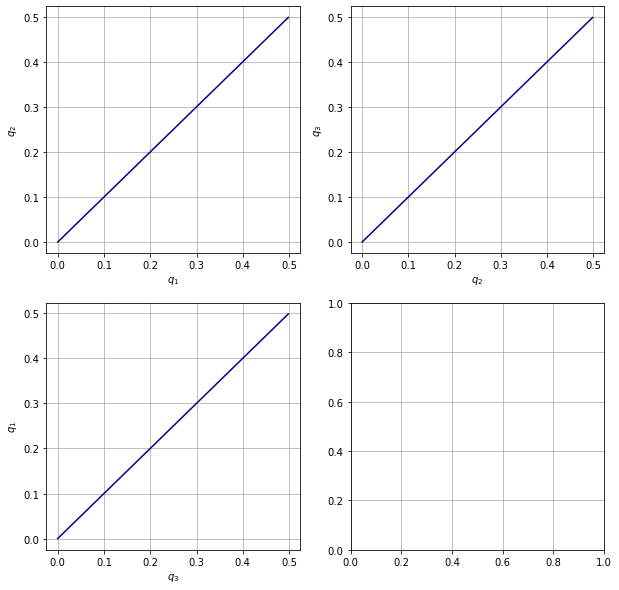

In [10]:
qq_plot(q_arr[:, :3])

#### Эволюция вектора управляющего момента
Для всех компонент схожая картина, поэтому приведём только график для компоненты по первой оси управления.

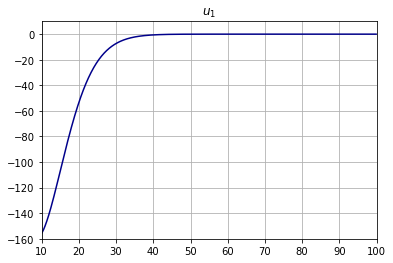

In [11]:
u = u_calc(omega_arr, q_arr[:, :3])
u_plot(1)

#### Эволюция угла поворота вокруг собственной оси во времени
Значение угла $\phi$ в каждый момент времени можно получить, используя соотношение $q_0 = \cos \frac{\phi}2$.

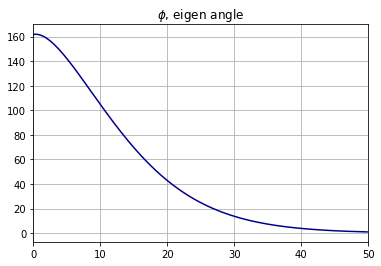

In [12]:
def eigenangle_plot(q0_arr):
    q0_ = q0_arr/np.max(q0_arr)
    plt.plot(t_arr[:int(N/2)], np.rad2deg(np.arccos(q0_)*2)[:int(N/2)], color = 'darkblue')
    plt.grid()
    plt.title('$\phi$, eigen angle')
    plt.xlim(0, T/2)
    
eigenangle_plot(q_arr[:, 3])

### Анализ результатов. Выводы
Проведённый расчёт показывает, что выбранные матрицы коэффициентов $\mathbf K_{\omega}$ и $\mathbf K_q$ обеспечивают идеальное вращение по собственной оси.  

Это хорошо визуализируют графики зависимости $q_i(q_j),\;{i, j \in \{1, 2, 3\}}$. Видно, что в каждый момент времени значения всех компонент направляющего вектора оси Эйлера равны друг другу. Это соответствует движению по прямой линии, а значит, такой манёвр действительно позволяет осуществить кратчайший путь из одной ориентации в другую. Если брать другие коэффициенты, то на графиках $q_i(q_j)$ будет наблюдаться отклонение от прямой линии. 

Как нетрудно проследить из графика угловой скорости, к моменту времени $50$с переориентация уже произведена, и все компоненты приближаются к нулевому значению. То же следует и из графика управляющего момента, и из графика зависимости собственного угла от времени.

В итоге, проверено теоретическое утверждение, что матрицы коэффициентов, пропорциональные матрице инерции, способны обеспечить поворот вокруг собственной оси на большой угол (в смоделированном примере - $161.7^{\circ}$).

При таком выборе матриц выполняется условие глобальной устойчивости, что было показано выше при помощи функции Ляпунова.

### Использованная литература
1. [Quaternion Feedback Regulator for spacecraft eigenaxis rotations](https://arc.aiaa.org/doi/10.2514/3.20418)
2. [Пример о вращательной динамике твёрдого тела](https://github.com/DPritykin/Control-Theory-Course/blob/main/Term%202%20Nonlinear%20Dynamics%20and%20Control/Lecture%20Jupyter%20Notebooks/Lecture%203%20Lyapunov-based%20Control%20Continued.ipynb)
3. Презентация **Skoltech** "Spacecraft Dynamics and Control"